# Домашнее задание 3
### Линейная и логистическая регрессия

Оформление дз:
Присылайте выполненное на почту `mlphystech@gmail.com` файлы .pdf и .ipynb или ссылку на свой гитхаб.

**Дедлайн: 11 апреля 23:59**

*Зуева Надежда*

ФИВТ МФТИ

Это задание будет посвящено линейной и логистической регрессии.
Мы надеемся, что вы уже знаете, что такое `kaggle`, так как сегодня нам предстоит поработать с самым *классическим* датасетом машинного обучения, а именно $-$ с Титаником!


Цель соревнования $-$ предсказать, кто из пассажиров выживет, а кто, увы, нет.

https://www.kaggle.com/c/titanic

## Теоретические вопросы
### 2 балла (по 0.5 за каждый верный ответ)
1. Что такое линейные модели классификации и регрессии? В чем их основные свойства? Где хорошо работают?
2. Что такое регуляризация и как она используется? 
3. Что такое MSE? Приведите пример.
4. Что такое градиентный спуск? Опишите базовый алгоритм работы.

P.S. просьба не копипастить из Википедии. Это все легко вычисляется и будет караться :)

**Ответы:**
1. Линейная регрессия основана на методе наименьших квадратов, а линейная модель классификации воплощает идею разделения пространства объектов гиперплоскостью на два полупространства и на два соответствующих класса.
Линейная регрессия позволяет найти некотрую линейную зависимость между искомым значением и известными данными.
В сравнении с kNN после обучения эти модели требует меньшее количество ресурсов.
2. Регуляризация - это штраф модели, предотвращающий переобучение. При переобучении веса в МНК принимают большие значения, поэтому делают функцианал ошибки, зависимый от этих весов. При больших значениях весов ошибка также увеличвается.
3. MSE - средняя квадратичная ошибка. Это один из способов вычисления ошибки измерений. Часто применяется при измерении каких-либо физических величин, а также может использоваться в функцианале ошибки какой-либо модели.
4. Градиентный спуск - это метод, позволяющий найти экстремум функции. Предположим, что у нас есть какая-то функция $u= f(i, j, k)$, тогда задаются какие-то начальные занчения $i$,$j$,$k$. Получают градиент функции $$\nabla u = ( \frac{\delta u}{\delta i}, \frac{\delta u}{\delta j},\frac{\delta u}{\delta k})$$ и по его напралению определяют, как нужно изменить значения, чтобы достичь экстремум. Если нужно найти максимум, то двигаются в направлении градиента, а если нужен минимум, то в противоположном. Затем снова получают градиент функции и изменяют значения $i$,$j$,$k$, и так пока не достигнут желаемого.

## Задание 1 (4 балла)
Скачайте файлы `train.csv` и `test.csv`.

Выведите первые 10 строк из `train.csv`

In [1]:
import pandas
from copy import deepcopy
import numpy as np
import pandas as pd


data = pd.read_csv('train.csv') #считайте данные из файла train.csv

In [2]:
data.head(10)#выведите первые 10 строк из data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
from matplotlib import pylab, gridspec, pyplot as plt
import seaborn

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Как мы видим, не все данные *

полны*. Например, это видно в столбце `Age`. 
В качестве простейшего решения мы предлагаем заменить пропущенные значения на медианные (функция `numpy.median`)
Вы можете воспользоваться нашим методом или произвести собственный анализ и заменить значения более умным способом (profit: бонусные баллы).

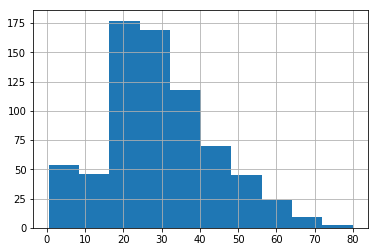

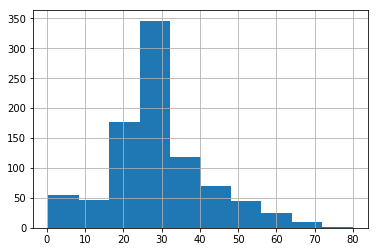

In [5]:
data['Age'].hist()
plt.figure()
data["Age"].fillna(data["Age"].median()).hist()

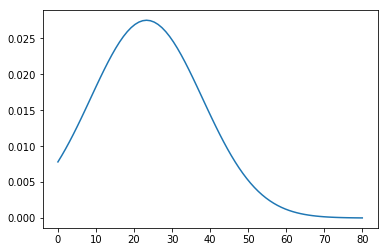

In [6]:
o = 210
u = 23
s = 1
yy = np.fromfunction(lambda x: (1/(o*2*np.pi)**0.5)*(np.e**(-((x*s - u)**2)/2/o)), (80,))
plt.plot(np.linspace(0, 80, 80), yy)

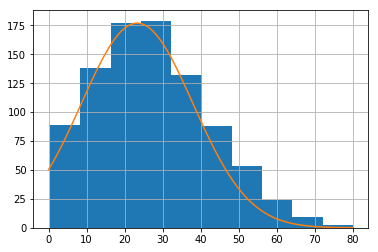

In [7]:
m = data["Age"].fillna(8, limit = 35).fillna(15, limit = 92).fillna(25, limit = 10).fillna(35, limit = 14).fillna(45, limit = 18).fillna(55, limit = 8)
m.hist()
plt.plot(np.linspace(0, 80, 80), yy*180/0.028)


In [8]:
print(m.mean())

27.895813692480356


In [9]:
# Replace all the missing ages in the data with the median age
df = deepcopy(data)
df["Age"] = df["Age"].fillna(df["Age"].median())

Теперь займемся **оцифровкой признаков**

Кстати, напомните, а зачем нам это нужно? :)

$*$ ваш ответ $*$
**Ответ:** будет применяться алгоритм, умеющий работать только с числами, а потерять, возможно, важную информацию об объектах не хочется.

Какой параметр здесь бинарный? Оцифруйте его при помощи нулей и единиц.

In [10]:
df.loc[df["Sex"] == "male", "Sex"] = 0#тут что-то должно быть 
df.loc[df["Sex"] == "female", "Sex"] = 1#тут что-то должно быть

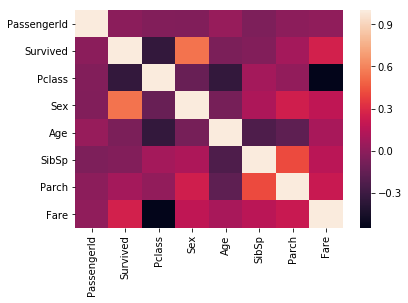

In [11]:
seaborn.heatmap(df.corr())# онa на самом деле оказалaсь важной

Выведите описание нашего датасета после изменений с помощью функции `describe`.
Сколько процентов пассажиров выжило? Каков был средний возраст всех пассажиров?

In [12]:
print (df.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000

Продолжим заполнять пропуски. Рассмотрим графу пунктов отправления `Embarked` 

Там есть типы данных:

C = Cherbourg, Q = Queenstown, S = Southampton, а также `nan`

In [13]:
print (df["Embarked"].unique())

['S' 'C' 'Q' nan]


In [14]:
import collections
print(collections.Counter(df['Embarked']))

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})


In [15]:
df[df["Embarked"].fillna("n") == "n"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [16]:
df[df["Cabin"] == "B28"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


С учетом последней ячейки заполните пропущенные значения по своему усмотрению. Объясните свой выбор, затем оцифруйте признак `Embarked` 

Например, заменив все на {0,1,2} или {12,42,10}, как хотите :)

In [17]:
df["Embarked"] = df["Embarked"].fillna("S")# загуглил фамилии, и нашёл сайт посвящённый пассажирам Титаника
#оказалось они из Southampton

#тут ваш код c оцифровкой 
df.loc[df["Embarked"] == "S", "Embarked"] = 0
df.loc[df["Embarked"] == "C", "Embarked"] = 1
df.loc[df["Embarked"] == "Q", "Embarked"] = 2

Разобьем выборку на `X` и `y`, где для`y` будем строить предсказания

In [18]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [19]:
y = pd.Series(df['Survived'])

In [20]:
X = np.array(df[list(set(df._get_numeric_data().columns) - {'Survived'})])#тут ваш код

Каким образом можно отобрать фичи, которые будут влиять на наш скор? Тут нам помогут ваш жизненный опыт и ` Recursive Feature Elimination` из библиотеки `Sklearn` 

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LinearRegression
model = LinearRegression(normalize = True)
#тут ваш код
selector = RFE(model, 7)
selector = selector.fit(X, y)

X = np.array(df[list(set(df._get_numeric_data().columns) - {'Survived', 'PassengerId'})])
pd.DataFrame({'Support':selector.support_, 'Rank': selector.ranking_}, index = list(set(df._get_numeric_data().columns) - {'Survived'}))

,Rank,Support
Embarked,1,True
Parch,1,True
Pclass,1,True
Age,1,True
Sex,1,True
PassengerId,2,False
SibSp,1,True
Fare,1,True


Проверьте, похожи ли отобранные вами фичи на те, что представленны ниже?

In [22]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [23]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, random_state=1).split(X, y)

Выполним предсказания:

In [24]:
predicts = []
for train, test in kfold:
    model.fit(X[train], y[train])
    predicts.append(model.predict(X[test]))
predicts = np.concatenate(predicts)

#print (predicts)

predicts[predicts > 0.5],predicts[predicts < 0.5] = 1,0


accuracy = np.count_nonzero(df["Survived"] == predicts)/df["Survived"].count()
print ('Скор для линейной регрессии:',accuracy)


Скор для линейной регрессии: 0.7833894500561167


## Задание 2 (2 балла)
Теперь попробуем проделать то же самое для **логистической регрессии**

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [25]:
model = LogisticRegression(penalty = 'l2', C = 0.111, solver = 'newton-cg')#тут можно подбирать параметры для повышения скора

Вычислим оценку точности для всех кросс-валидационных фолдов: возвращаем массив баллов из 3-х фолдов

In [26]:
#тут ваш код
kfold = KFold(n_splits=3, random_state=1).split(X, y)
scores = []
for train, test in kfold:
    model.fit(X[train], y[train])
    predict = (model.predict(X[test]))
    scores.append(np.count_nonzero(df["Survived"][test] == predict)/df["Survived"][test].count())

scores = np.array(scores)
print("Скор для логистической регрессии: " + str(scores.mean()))

Скор для логистической регрессии: 0.7991021324354658


0.7957351290684623

###### Как бы вы объяснили прирост качества в логистической регрессии? 
Сможете побить наш бейзлайн? :)

**Ответ:** Как мне кажется, это из-за регулярезации. В логистической регресии получилась меньшая дисперсия... или же просто теперь нет значения `0.5`, а вместо этого всегда принимается за ответ только `1` или только `0`.

## Задание 3 (1.5 балла)
Отправьте ваше решение в тестирующую систему и посмотрите, какое место вы займете

рассмотрим `test.csv`

In [35]:
df_test = pd.read_csv("test.csv")
print(df_test.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


Надо вернуть оцифрованные данные к первоначальному виду:

In [36]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
df_test_m = deepcopy(df_test[features])
df_test_m.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [37]:
def repl(col, val1, val2):
    df_test_m.loc[df_test_m[col] == val1, col] = val2

repl('Sex', 'male', 0)
repl('Sex', 'female', 1)
repl('Embarked', 'S', 0)
repl('Embarked', 'C', 1)
repl('Embarked', 'Q', 2)
df_test_m["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())
df_test_m["Age"] = df_test["Age"].fillna(pd.concat((df_test_m['Age'], m)).median())
df_test_m.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [38]:
model = LogisticRegression(penalty = 'l2', C = 0.111, solver = 'newton-cg')

model.fit(X, y)
predicts = model.predict(df_test_m)

submission = pandas.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": predicts
})

submission.to_csv("submission.csv", index=False) #вот это отправляется в каггл

Можете попробовать и дальше "поиграться" с параметрами, чтобы подняться в лидерборде. Например, попробовать подобрать параметры в регрессорах. 
Удачи!
    Напоминаем, что справку по любой функции (в том числе и по регрессорам) можно получить, если с наведенным курсором на функцию нажать `Tab`+`Shift`